Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name, email and UFID.
Please do not modify instruction cells or any cells with automated tests (marked with `[ASSERTS]`). Note: you can add new cells if you need them, but answers must be in the cells with `YOUR CODE HERE` or "YOUR ANSWER HERE" comments.

---

# Homework 1: Basic Practice

## Preamble: Write your Name, Email and UFID

In [1]:
NAME = 'Kondreddy Rohith Sai Reddy'
EMAIL = 'r.kondreddy@ufl.edu'
UFID = 65682267

# YOUR CODE HERE
# raise NotImplementedError()

print('Homework 1 -- name: {}, email: {}, UFID: {}\n'.format(NAME, EMAIL, UFID))

Homework 1 -- name: Kondreddy Rohith Sai Reddy, email: r.kondreddy@ufl.edu, UFID: 65682267



In [2]:
""" [ASSERTS] Check that your name, email, and UFID is filled in."""
assert NAME != '' and NAME != 'Your name here.' and len(NAME) > 3
assert EMAIL != '' and EMAIL != 'Your email here.' and len(EMAIL) > 7
assert type(UFID) == int and UFID != 12345678 and UFID >= 10000000 and UFID <= 99999999

## Academic Integrity

### <span style="color:red;">This is an individual assignment. Academic integrity violations (i.e., cheating, plagiarism) will be reported to SCCR!</span><br/>
#### The official CISE policy recommended for such offenses is a course grade of E. Additional sanctions may be imposed by SCCR such as marks on your permanent educational transcripts, dismissal or expulsion.
#### Reminder of the Honor Pledge: On all work submitted for credit by Students at the University of Florida, the following pledge is either required or implied: *"On my honor, I have neither given nor received unauthorized aid in doing this assignment."*

#### Acknowledgement: Do you acknowledge and understand the academic integrity warning above? 

In [3]:
academic_integrity_acknowledgement = True
# YOUR CODE HERE
# raise NotImplementedError()

In [4]:
""" [ASSERTS] Check that you acknowledge the academic integrity warning, you understand it and have been reminded of the UF Honor Pledge."""
assert academic_integrity_acknowledgement

---
# [Task 1] (25 points) Loading and preprocessing.

### [Task 1] We will use the diabetes dataset including in sklearn. In this task you will load the data and preprocess it.

#### The following cell's code (import statements etc.) is provided for you and you should not need to change it.

In [5]:
# Load packages we need
import sys
import os
import time

import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

# Let's check our software versions
print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

def var_exists(var_name):
    return (var_name in globals() or var_name in locals())

------------
### Python version: 3.11.7 (v3.11.7:fa7a6f2303, Dec  4 2023, 15:22:56) [Clang 13.0.0 (clang-1300.0.29.30)]
### NumPy version: 1.26.3
### Scikit-learn version: 1.3.2
------------


#### This is the seed we will use, do not change it.

In [6]:
# set the seed
seed = 42
np.random.seed(seed)

In [7]:
""" [ASSERTS] Check seed. """
assert seed == 42

## [Task 1a] (10 points) Load the 'diabetes' dataset. Extract the feature names into 'feature_names', let 'target_name' be 'target' and create a list of all column names 'col_names' to include both the feature names and the target name. Finally, grab the feature matrix in 'all_x' and target vector in 'all_y'.

In [8]:
"""Put your code to load the dataset here.
"""
from sklearn import datasets
# YOUR CODE HERE


diabetes = datasets.load_diabetes()

feature_names = diabetes.feature_names

target_name = 'target'

col_names = feature_names + [target_name]

all_x = diabetes.data
all_y = diabetes.target



# raise NotImplementedError()

print('Loaded diabetes data: {} rows and {} features.'.format(all_x.shape[0], all_x.shape[1]))
print('Column names: {}.'.format(col_names))

Loaded diabetes data: 442 rows and 10 features.
Column names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target'].


In [9]:
""" [ASSERTS] Check dataset was loaded and task 1a completed. """

assert var_exists('diabetes') and type(diabetes) == sklearn.utils._bunch.Bunch
assert var_exists('feature_names') and type(feature_names) == list
assert var_exists('target_name')
assert var_exists('col_names') and len(col_names) == 11
assert var_exists('all_x') and var_exists('all_y')
assert all_x.shape == (442,10) and all_y.shape == (442,)


## [Task 1b] (5 points) Rescaling features and target. The dataset's features have been mean centered and scaled so the column sum of squares add up to 1. We don't like this so you will rescale each of the features to lie in [0, 1] assuming that each value currently lies in the range [-0.2, 0.2] (clamping any value that falls outside [0,1]). You will store the rescaled feature matrix in 'all_x_rescaled'. 
## You will then binarize the target vector such that any value less than 140 is labeled 0 and any other value greater is labeled 1 and store the result in 'all_y_threshold'. Finally ensure that the dtype of 'all_y_threshold' is int. (Note: this step creates for us a binary classification task, even though this dataset is more commonly used for regression.)

In [10]:
"""Put your code here to rescale the features and binarize the target.
"""
assumed_min_val_x = -0.2
assumed_max_val_x = +0.2

threshold_y = 140.0

# YOUR CODE HERE


all_x_rescaled = np.clip((all_x - assumed_min_val_x) / (assumed_max_val_x - assumed_min_val_x), 0, 1)

all_y_threshold = np.where(all_y < threshold_y, 0, 1).astype(int)

all_x_rescaled.shape, all_y_threshold.shape, all_y_threshold.dtype

# all_y_threshold
# raise NotImplementedError()

((442, 10), (442,), dtype('int64'))

In [11]:
""" [ASSERTS] Check rescaling for task 1b. """
assert var_exists('all_x_rescaled') and all_x_rescaled.shape == all_x.shape
assert var_exists('all_y_threshold') and all_y_threshold.shape == all_y.shape
assert all_y_threshold.dtype == int


## [Task 1c] (5 points) Now split the data into (train, val, test) with (0.6, 0.2, 0.2) proportions using 'train_test_split' from sklearn (hint: you will have to invoke the function twice). Make sure you use the seed so that the split is reproducible. Store the results into 'train_x', 'train_y', 'val_x', 'val_y', 'test_x', 'test_y'.

In [12]:
"""Put your code here for the train, val, test split.
"""
from sklearn.model_selection import train_test_split

# YOUR CODE HERE

# First split
train_x, temp_x, train_y, temp_y = train_test_split(all_x_rescaled, all_y_threshold, test_size=0.4, random_state=seed)

# Second split
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=seed)


# raise NotImplementedError()

In [13]:
""" [ASSERTS] Check split for task 1c. """
assert var_exists('train_x') and var_exists('train_y') and train_x.shape[0] == train_y.shape[0]
assert var_exists('val_x') and var_exists('val_y') and val_x.shape[0] == val_y.shape[0]
assert var_exists('test_x') and var_exists('test_y') and test_x.shape[0] == test_y.shape[0]
assert train_x.shape == (265, 10) or train_x.shape == (264, 10)  or train_x.shape == (266, 10) 
assert val_x.shape == (88, 10) or val_x.shape == (89, 10) or val_x.shape == (87, 10) 
assert test_x.shape == (88, 10) or test_x.shape == (89, 10) or test_x.shape == (87, 10) 


## [Task 1d] (5 points) Is the (preprocessed) dataset balanced or not? Justify your answer. Use the training set to answer.

In [14]:
"""Put your code here for task 1d. Then answer the question (write your answer in a comment in the space provided).
"""

# YOUR CODE HERE
unique, counts = np.unique(train_y, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Print the class distribution to check the balance
print(class_distribution)


# Based on the class distribution in 'train_y', the numbers of instances for each class are roughly equal, 
# then the dataset is balanced.




# raise NotImplementedError()

## Answer: 

{0: 130, 1: 135}


---
# [Task 2] (25 points) Exploring the data. In this task we will look at the data, specifically correlations in the data and think about potentially redundant or useless features.

## [Task 2a] (5 points) To look at the data should we use the training set, the validation set, the test set or all of the data? Justify your answer.

In [15]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)
"""
# YOUR CODE HERE

## Answer: 
#
# To properly analyze the data it is recommended to utilize the training set. 
# This is because using either the test or validation set can result in data leakage, where information, 
# from sources outside of the training dataset influences the models performance. 
# The training set generally represents the subset. 
# Is most indicative of the overall datasets characteristics making it ideal for comprehending data distribution, 
# patterns and any potential issues that may arise. Moreover it is crucial to reserve the test and validation sets, 
# for evaluating the models performance and fine tuning its hyperparameters to ensure an evaluation process. 
# Hence opting for the training set offers an choice when it comes to exploring and analyzing data.
#




# raise NotImplementedError()

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)\n"

## [Task 2b] (10 points) Create a visualization of the training data correlations. You can do a heatmap like we did in exercise 1, you can use pandas and plot a scatter matrix, or you can do it manually. But your code must be self-contained and fit in the cell below and it must show/quantify the correlations between any pairs of features or any feature and the target.

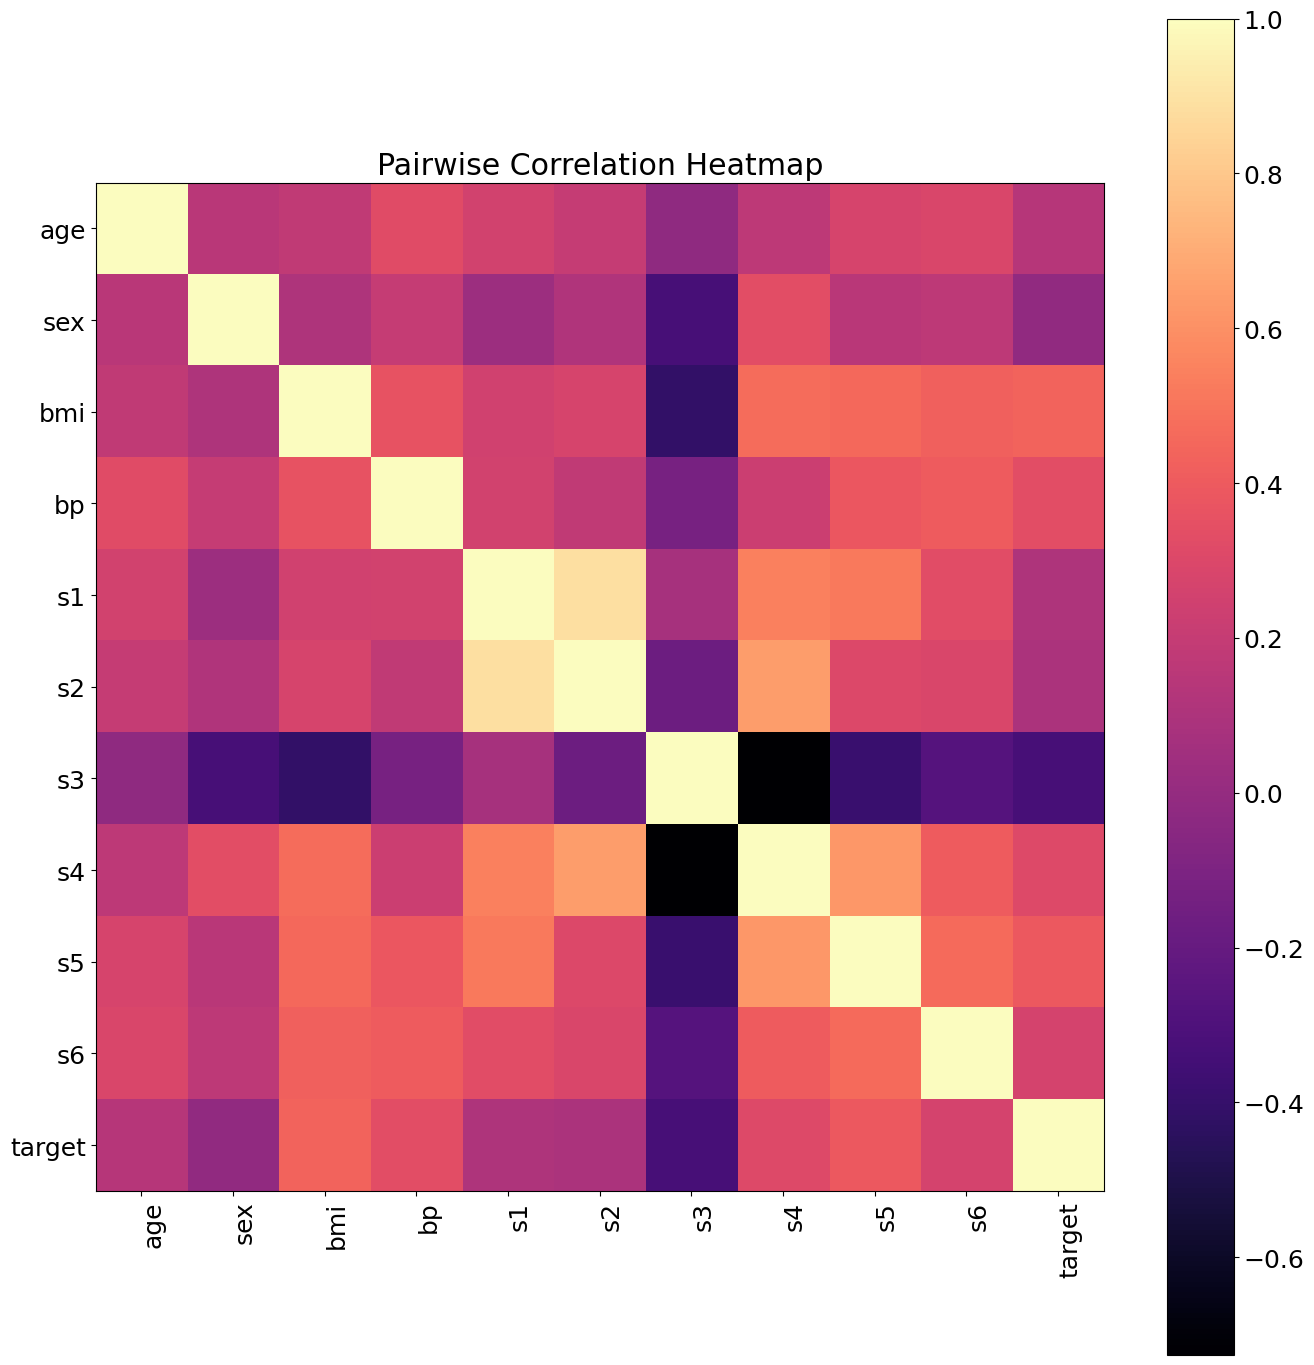

In [16]:
"""Put your code here for task 2b. The code must be self-contained to this cell.
"""

# YOUR CODE HERE
# sys.path.insert(1, 'common/')
# import plots
# import utils

# -*- coding: utf-8 -*-
""" CAI41046108 ML Engineering --- plots.py
"""

import numpy as np
from matplotlib import pyplot as plt   

def heatmap(map_data, row_labels, col_labels, title=None, rot=45, fsz=None, 
                show_values=False, colorbar=True, cmap='magma'):
    # see: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

    plt.rcParams.update({'font.size': 18})

    if fsz is not None:
        fig, ax = plt.subplots(figsize=fsz)
    else:
        fig, ax = plt.subplots()
    im = ax.imshow(map_data, cmap=cmap)

    assert len(row_labels) == map_data.shape[0]
    assert len(col_labels) == map_data.shape[1]

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(row_labels)))
    ax.set_yticks(np.arange(len(col_labels)))

    # ... and label them with the respective list entries
    ax.set_xticklabels(row_labels)
    ax.set_yticklabels(col_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=rot, ha="right",
             rotation_mode="anchor")

    if show_values:
        # Loop over data dimensions and create text annotations.
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if i != j:
                    text = ax.text(j, i, '{:.2f}'.format(map_data[i,j]),
                               ha="center", va="center", color="w")

    if title is not None:
        ax.set_title(title)

    if colorbar:
        fig.colorbar(im)

    fig.tight_layout()
    plt.show()  


## Fill in your own implementation
def lines_plot(x_data, y_series, x_label=None, series_labels=None, y_label = None, x_lim = None, y_lim = None, title=None, fsz=None, 
                markers=None, colors=None, linestyles=None, linewidths=None):
    
    from matplotlib import pyplot as plt
    plt.rcParams.update({'font.size': 18})

    plt.figure(figsize=fsz)

    num_series = y_series.shape[0]
    if series_labels is None:
        series_labels = ['Series {}'.format(i) for i in range(0, num_series)]    

    for i in range(0, num_series):
        marker = None
        if markers is not None:
            assert len(markers) == num_series
            marker = markers[i]

        color = None
        if colors is not None:
            assert len(colors) == num_series
            color = colors[i]

        linestyle = None
        if linestyles is not None:
            assert len(linestyles) == num_series
            linestyle = linestyles[i]

        linewidth = None
        if linewidths is not None:
            assert len(linewidths) == num_series
            linewidth = linewidths[i]


        plt.plot(x_data, y_series[i,:], label=series_labels[i], marker=marker, color=color,
                        linestyle=linestyle, linewidth=linewidth)

    if x_lim is not None:
        plt.xlim(x_lim)
    if y_lim is not None:
        plt.ylim(y_lim)

    if x_label is not None:
        plt.xlabel(x_label)

    if y_label is not None:
        plt.ylabel(y_label)

    plt.legend()
    

## from: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


## from: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
def contours(ax, model, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
    
    
"""
## Plots a set of images (all m x m)
## input is  a square number of images, i.e., np.array with shape (z*z, dim_x, dim_y) for some integer z > 1
"""
def plot_images(im, dim_x=28, dim_y=28, one_row=False, out_fp='out.png', save=False, show=True, cmap='gray', fig_size=(14,14), titles=None, titles_fontsize=12):
    fig = plt.figure(figsize=fig_size)
    im = im.reshape((-1, dim_x, dim_y))

    num = im.shape[0]
    assert num <= 3 or np.sqrt(num)**2 == num or one_row, 'Number of images is too large or not a perfect square!'
    
    if titles is not None:
        assert num == len(titles)
    
    if num <= 3:
        for i in range(0, num):
            plt.subplot(1, num, 1 + i)
            plt.axis('off')
            if type(cmap) == list:
                assert len(cmap) == num
                plt.imshow(im[i], cmap=cmap[i]) # plot raw pixel data
            else:
                plt.imshow(im[i], cmap=cmap) # plot raw pixel data
            if titles is not None:
                plt.title(titles[i], fontsize=titles_fontsize)
    else:
        sq = int(np.sqrt(num))
        for i in range(0, num):
            if one_row:
                plt.subplot(1, num, 1 + i)
            else:
                plt.subplot(sq, sq, 1 + i)
            plt.axis('off')
            if type(cmap) == list:
                assert len(cmap) == num
                plt.imshow(im[i], cmap=cmap[i]) # plot raw pixel data
            else:
                plt.imshow(im[i], cmap=cmap) # plot raw pixel data
            if titles is not None:
                plt.title(titles[i], fontsize=titles_fontsize)

    if save:
        plt.savefig(out_fp)

    if show:
        plt.show()
    else:
        plt.close()
        
        
"""
## Plots an image (m x m)
## input is an array sizeable to shape (dim_x, dim_y)
"""
def plot_single_image(im, dim_x=28, dim_y=28, out_fp='out.png', save=False, show=True, cmap='gray', fig_size=(7,7)):
    fig = plt.figure(figsize=fig_size)
    im = im.reshape((-1, dim_x, dim_y))
    assert im.shape[0] == 1
    
    im = im.reshape(dim_x, dim_y)
    
    plt.axis('off')
    plt.imshow(im, cmap=cmap) # plot raw pixel data

    if save:
        plt.savefig(out_fp)

    if show:
        plt.show()
    else:
        plt.close()

# -*- coding: utf-8 -*-
""" CAI41046108 ML Engineering --- utils.py
"""


import json
import re
import os
import time

import numpy as np


## os / paths
def ensure_exists(dir_fp):
    if not os.path.exists(dir_fp):
        os.makedirs(dir_fp)


## parsing / string conversion to int / float
def is_int(s):
    try:
        z = int(s)
        return z
    except ValueError:
        return None


def is_number(s):
    try:
        z = int(s)
        return z
    except ValueError:
        try:
            z = float(s)
            return z
        except ValueError:
            return None


def train_test_val_split(x, y, prop_vec, shuffle=True, seed=None):

    assert x.shape[0] == y.shape[0]
    prop_vec = prop_vec / np.sum(prop_vec) # normalize

    n = x.shape[0]
    n_train = int(np.ceil(n * prop_vec[0]))
    n_test = int(np.ceil(n * prop_vec[1]))
    n_val = n - n_train - n_test

    assert np.amin([n_train, n_test, n_val]) >= 1   

    if shuffle:
        rng = np.random.default_rng(seed)
        pi = rng.permutation(n)
    else:
        pi = xrange(0, n)

    pi_train = pi[0:n_train]
    pi_test = pi[n_train:n_train+n_test]
    pi_val = pi[n_train+n_test:n]

    train_x = x[pi_train]
    train_y = y[pi_train]

    test_x = x[pi_test]
    test_y = y[pi_test]

    val_x = x[pi_val]
    val_y = y[pi_val]  
    
    return train_x, train_y, test_x, test_y, val_x, val_y


def print_array_hist(x, label=None):
    assert len(x.shape) <= 1 or x.shape[1] == 1

    if label is not None:
        print('--- {} ---'.format(label))
    for v in np.unique(x):
        print('{}: {}'.format(v, np.sum(x == v)))



def print_array_basic_stats(x, label=None):
    assert len(x.shape) <= 1 or x.shape[1] == 1

    if label is not None:
        print('--- {} ---'.format(label))

    print('min: {:.2f}'.format(np.amin(x)))
    print('max: {:.2f}'.format(np.max(x)))
    print('mean (+- std): {:.2f} (+- {:.2f})'.format(np.mean(x), np.std(x)))      
        

"""
## Load and preprocess the MNIST dataset
"""
def load_preprocess_mnist_data(flatten=True, onehot=True, prop_vec=[26, 2, 2], seed=None, verbose=False):

    from tensorflow.keras.datasets import mnist
    import tensorflow.keras as keras
    
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if verbose: # MNIST has overall shape (60000, 28, 28) --- 60k images, each is 28 x 28 pixels
        print('Loaded MNIST data; shape: {} [y: {}], test shape: {} [y: {}]'.format(x_train.shape, y_train.shape,
                                                                                      x_test.shape, y_test.shape))
    
    if flatten: # Let's flatten the images for easier processing (labels don't change)
        flat_vec_size = 28*28
        x_train = x_train.reshape(x_train.shape[0], flat_vec_size)
        x_test = x_test.reshape(x_test.shape[0], flat_vec_size)

    if onehot: # Put the labels in "one-hot" encoding using keras' to_categorical()
        num_classes = 10
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

    # let's aggregate all the data then split
    all_x = np.r_[x_train, x_test]
    all_y = np.r_[y_train, y_test]
    
    # split the data into train, test, val
    train_x, train_y, test_x, test_y, val_x, val_y = train_test_val_split(all_x, all_y, prop_vec, shuffle=True, seed=seed)
    
    return train_x, train_y, test_x, test_y, val_x, val_y, all_x, all_y




# Combining features and target for correlation analysis
train_xy = np.hstack((train_x, train_y.reshape(-1, 1)))

# Calculating pairwise correlations
pairwise_corr = np.corrcoef(train_xy, rowvar=False)

# Using the heatmap function from the plots module to create a heatmap of the correlations
heatmap(pairwise_corr, col_names, col_names, title="Pairwise Correlation Heatmap", rot=90, fsz=(14, 14))







# raise NotImplementedError()

In [17]:
""" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"""
# THIS CODE CELL IS INTENTIONALLY LEFT EMPTY --- DO NOT MODIFY THIS CELL
# YOUR CODE HERE
# raise NotImplementedError()

" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"

## [Task 2c] (5 points) According to your visualization: what are the four features that are the most informative with respect to the target? 

In [18]:
"""Put any code on this cell that may help you answer task2c or 2d.
"""


target_correlations = pairwise_corr[:-1, -1]

correlation_series = pd.Series(target_correlations, index=col_names[:-1])

sorted_correlations = correlation_series.abs().sort_values(ascending=False)

print("The four most informative features with respect to the target are: BMI, S5, BP, S3.")
print(sorted_correlations)

train_df = pd.DataFrame(train_x, columns=feature_names)
train_df[target_name] = train_y

corr_matrix = train_df.corr()

corr_matrix #To know the relation between the variables
# YOUR CODE HERE
# raise NotImplementedError()

The four most informative features with respect to the target are: BMI, S5, BP, S3.
bmi    0.438256
s5     0.390867
bp     0.335411
s3     0.333293
s4     0.308165
s6     0.267119
age    0.138243
s1     0.103908
s2     0.093356
sex    0.017431
dtype: float64


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.155617,0.181918,0.325217,0.255632,0.198098,-0.021474,0.166779,0.277268,0.290260,0.138243
sex,0.155617,1.000000,0.108613,0.197779,0.033790,0.114525,-0.332664,0.332752,0.150408,0.168692,-0.017431
bmi,0.181918,0.108613,1.000000,0.362178,0.247605,0.275607,-0.410774,0.471549,0.455726,0.420392,0.438256
bp,0.325217,0.197779,0.362178,1.000000,0.257231,0.177557,-0.119679,0.230097,0.382914,0.402630,0.335411
s1,0.255632,0.033790,0.247605,0.257231,1.000000,0.889744,0.069793,0.542795,0.520313,0.326353,0.103908
s2,0.198098,0.114525,0.275607,0.177557,0.889744,1.000000,-0.173146,0.646150,0.302255,0.289743,0.093356
s3,-0.021474,-0.332664,-0.410774,-0.119679,0.069793,-0.173146,1.000000,-0.726317,-0.383001,-0.270438,-0.333293
s4,0.166779,0.332752,0.471549,0.230097,0.542795,0.646150,-0.726317,1.000000,0.627234,0.404831,0.308165
s5,0.277268,0.150408,0.455726,0.382914,0.520313,0.302255,-0.383001,0.627234,1.000000,0.466444,0.390867
s6,0.290260,0.168692,0.420392,0.402630,0.326353,0.289743,-0.270438,0.404831,0.466444,1.000000,0.267119


In [19]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer: 
#
# YOUR CODE HERE
#
# The four most informative features with respect to the target are 'bmi', 's5', 'bp', and 's3'.
# These specific features exhibit the correlation, 
# with the target variable suggesting that they are likely to be the influential predictors, in the dataset.
#

# raise NotImplementedError()

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

## [Task 2d] (5 points) Are there any features that are redundant and that you would consider removing. If so, which ones and why and if not why not?

In [20]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer: 

#
# There are some features, like S1 and S2 that seem to be redundant because they have a correlation. 
# Additionally S4 has correlations, with features although not excessively high. 
# We could try removing this pair on a trial basis to see if it simplifies the model and 
# improves performance without affecting accuracy. Ultimately the decision to remove any features would depend on a 
# combination of correlation analysis, domain knowledge and how the model performs in practice.
#



# YOUR CODE HERE
# raise NotImplementedError()

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

---
# [Task 3] (25 points) Learning curves and data augmentation. In this task you will train SVM models, plot learnings curves, and try some (simple) data augmentation.

## [Task 3a] (5 points) Fill in the blanks to complete the code of the following two methods which we will use to train and evaluate the accuracy of models in the rest of the homework.

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

"""Fill in the code for 'model_acc' so the function returns the accuracy of the predictions on 'x'. Use 'accuracy_score' from sklearn. ('y' contains the true labels.)
"""
def model_acc(model, x, y):

    # YOUR CODE HERE

    predictions = model.predict(x)
    acc = accuracy_score(y, predictions)
    return acc

"""Fill in the code for 'train_and_eval_acc' so the function computes and return the train accuracy ('tr_acc') and the eval accuracy ('eval_acc'). Your code should use 'model_acc'.
"""
def train_and_eval_acc(model_instance, tr_x, tr_y, eval_x, eval_y):
    model = model_instance.fit(tr_x, tr_y) # trains the model

    # YOUR CODE HERE

    tr_acc = model_acc(model, tr_x, tr_y)
    eval_acc = model_acc(model, eval_x, eval_y)



    return tr_acc, eval_acc

In [22]:
""" [ASSERTS] Check task 3a. """

train_acc, val_acc = train_and_eval_acc(SVC(random_state=seed), train_x, train_y, val_x, val_y)

assert np.abs(train_acc - 0.8) < 0.1
assert np.abs(val_acc - 0.8) < 0.1


### The following is provided code to help you plot learning curves. You should not need to modify it.

In [23]:
def plot_learning_curves(train_szs, accs, model_name):
    fig, ax = plt.subplots(figsize=(12,7))

    assert accs.shape[-1] == 2, 'Must have last dim of size 2 with train acc and val/test acc.'
    assert len(accs.shape) == 2 or len(accs.shape) == 3, 'Invalid input'

    multiple_measurements = len(accs.shape) == 3
    if multiple_measurements:
        std_accs = np.std(accs, axis=0)
        accs = np.mean(accs, axis=0)
    
    plt.plot(train_szs, accs[:,0]*100.0, 'ro-', linewidth=3, label='Training')
    plt.plot(train_szs, accs[:,1]*100.0, 'bs--', linewidth=3, label='Test/Validation')

    if multiple_measurements:
        laccs = accs - std_accs
        uaccs = accs + std_accs
        plt.fill_between(train_szs, laccs[:,0]*100.0, uaccs[:,0]*100.0, color='r', alpha=0.3)
        plt.fill_between(train_szs, laccs[:,1]*100.0, uaccs[:,1]*100.0, color='b', alpha=0.3)

    ax.set_xlim(0, np.max(train_szs))
    ax.set_ylim(54, 104)
    ax.set_xlabel('Number of training examples')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curves for {}'.format(model_name))

    plt.legend()
    plt.show()

## [Task 3b] (5 points) Fill in the code below to plot the learning curves.

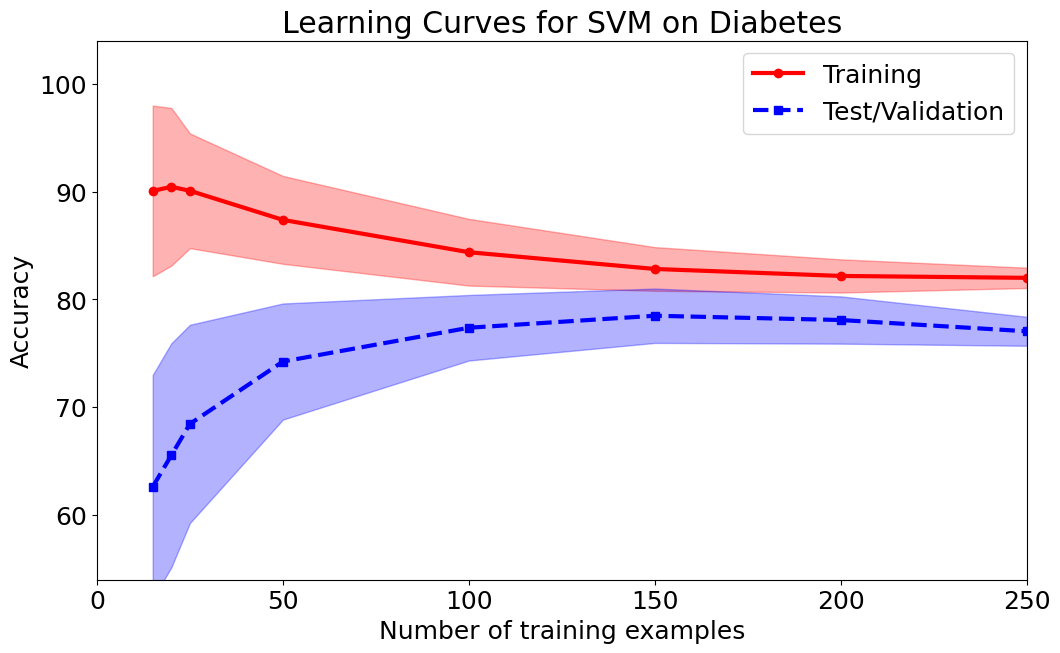

In [24]:
"""Fill in the code for 'get_learning_curve_acc' so the function trains and evaluate a SVC model (default parameters but set the seed) on 'tr_x/y' 
and 'eval_x_/y_' using 'train_and_eval_acc' in each iteration of the loop.
"""
def get_learning_curve_acc(tr_sizes, train_x_, train_y_, eval_x_, eval_y_):
    pi = np.random.permutation(train_x.shape[0])
    shuf_tr_x = train_x_[pi]
    shuf_tr_y = train_y_[pi]
    lc_arr = np.zeros((tr_sizes.shape[0],2))
    
    for i, tr_sz in enumerate(tr_sizes):
        tr_x = shuf_tr_x[0:tr_sz]
        tr_y = shuf_tr_y[0:tr_sz]
        # YOUR CODE HERE

        # print(seed)
        model = SVC(random_state=seed)
        tr_acc, val_acc = train_and_eval_acc(model, tr_x, tr_y, eval_x_, eval_y_)



        lc_arr[i,:] = [tr_acc, val_acc]
        
    return lc_arr


# the following will compute and plot the learning curves.
tr_sizes = np.array([15, 20, 25, 50, 100, 150, 200, 250,])
num_samples = 100
lc_arrs = None

for i in range(0, num_samples):
    lc_arr = get_learning_curve_acc(tr_sizes, train_x, train_y, val_x, val_y)
    lc_arrs = lc_arr[np.newaxis,:] if lc_arrs is None else np.r_[lc_arrs, lc_arr[np.newaxis,:]]

plot_learning_curves(tr_sizes, lc_arrs, 'SVM on Diabetes')

In [25]:
""" [ASSERTS] Check task 3b. """

assert var_exists('lc_arrs') and lc_arrs.shape == (100, tr_sizes.shape[0], 2)

In [26]:
""" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"""
# THIS CODE CELL IS INTENTIONALLY LEFT EMPTY --- DO NOT MODIFY THIS CELL
# YOUR CODE HERE
# raise NotImplementedError()

" THIS CODE CELL IS INTENTIONALLY LEFT EMPTY.  Remove the 'raise NotImplementedError' line. You should leave this cell empty (it is used for autograding). (Do not change the cell type from code to markdown.)"

## [Task 3c] (5 points) What can we say about the amount of training data from the learning curve? Would more data improve the model? Justify your answer.

In [27]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer: 
#
# YOUR CODE HERE




# Answer: 

# The learning curve indicates that as the training size increases the SVM models validation accuracy improves until a point.
# After reaching that point the curve starts to level off. 
# This suggests that initially the model benefits, from data but the rate of improvement in 
# validation accuracy decreases significantly after around 150 200 training examples. 
# Therefore it's unlikely that adding training data beyond this point would significantly enhance the 
# models performance on data. Instead it might be more fruitful to focus on exploring ways to improve the model, 
# such, as tuning hyperparameters selecting features effectively and considering alternative model architectures.
#



# raise NotImplementedError()

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

## [Task 3d] (5 points) It's time to try some data augmentation. Fill in the body of the loop. The provided code will add Gaussian noise (mean 0, standard dev sigma) to the training features to augment the dataset. It will then train and evaluate SVM models on the original data and the augmented data for various sigmas.

In [28]:
""" Add gaussian noise with mean 0 and standard deviation sigma to feature matrix x. Returns x and noisy x. """
def add_gaussian_noise(x, y, sigma):
    noisy_x = x + np.random.randn(*x.shape)*sigma
    out_x = np.r_[x, noisy_x]
    out_x = np.clip(out_x, 0.0, 1.0)
    out_y = np.r_[y, y]
    pi = np.random.permutation(out_x.shape[0])
    return out_x[pi,:], out_y[pi]


# first evaluate the model on the original data
train_acc_orig, val_acc_orig = train_and_eval_acc(SVC(random_state=seed), train_x, train_y, val_x, val_y)
print('[Original] Model accuracy --- train: {:.1f}%, val: {:.1f}%\n'.format( 100*train_acc_orig, 100*val_acc_orig))


num_runs = 100
sigmas = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 5.0, 10.0]
for sigma in sigmas:
    aug_accs = np.zeros((num_runs,2))
    for i in range(0, num_runs):
        """ Fill in the body of the loop to use add_gaussian_noise to augment the training data and then train and evaluate an SVC model (default parameters but set the seed). 
        Store the training accuracy in 'train_acc_aug' and the validation accuracy in 'val_acc_aug' """
        # YOUR CODE HERE

        aug_train_x, aug_train_y = add_gaussian_noise(train_x, train_y, sigma)
        train_acc_aug, val_acc_aug = train_and_eval_acc(SVC(random_state=seed), aug_train_x, aug_train_y, val_x, val_y)

        # raise NotImplementedError()
        aug_accs[i,:] = [train_acc_aug, val_acc_aug]

    mean_train_acc = np.mean(aug_accs[:, 0])
    mean_val_acc = np.mean(aug_accs[:, 1])

    print('[Augmented sigma={:.2f}] --- train: {:.1f}%, val: {:.1f}%'.format(sigma, 100*mean_train_acc, 100*mean_val_acc))

[Original] Model accuracy --- train: 82.6%, val: 77.3%

[Augmented sigma=0.00] --- train: 83.4%, val: 73.9%
[Augmented sigma=0.01] --- train: 83.6%, val: 74.9%
[Augmented sigma=0.05] --- train: 83.3%, val: 77.5%
[Augmented sigma=0.10] --- train: 81.6%, val: 78.6%
[Augmented sigma=0.20] --- train: 80.8%, val: 79.7%
[Augmented sigma=0.30] --- train: 80.8%, val: 80.1%
[Augmented sigma=0.50] --- train: 80.8%, val: 80.3%
[Augmented sigma=1.00] --- train: 80.3%, val: 81.4%
[Augmented sigma=5.00] --- train: 79.5%, val: 81.8%
[Augmented sigma=10.00] --- train: 79.4%, val: 81.8%


In [29]:
""" [ASSERTS] Check task 3d. """

assert var_exists('aug_accs') and np.amin(aug_accs) > 0.7

## [Task 3e] (5 points) Answer the following questions. (Q1) Is data augmentation effective in this case? Why or why not? (Q2) What do you observe to the train accuracy as sigma increases? Explain why this occurs.

In [30]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
## Answer to (Q1):
# Yes, data augmentation is effective in this case,
# We can see an improvement, in validation accuracy from 77.3% to 81.8% as sigma increases. 
#This indicates that the introduction of Gaussian noise to the training data aids the model in generalizing 
#towards unfamiliar data. It also suggests that the model benefits, from the added diversity and 
# intricacy that comes with such an approach.

## Answer to (Q2):
# As the value of sigma increases there is a decrease, in training accuracy from 83.4% to 79.4%. 
# This happens because when we introduce Gaussian noise it adds complexity and variability to the 
# training data making it more challenging for the model to perfectly fit the data. The decrease, in 
# training accuracy indicates that the model is becoming more robust reducing its tendency to excessively 
# adapt to the training data and improving its ability to generalize well with unseen data.


# raise NotImplementedError()

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

---
# [Task 4] (25 points) Naive Bayes. In this task you will train Naive Bayes models and for that you will do some feature engineering.

## [Task 4a] (5 points) Read up on Naive Bayes and answer the following questions in your own words. (Q1) What is the main assumption built into Naive Bayes models? Is this assumption reasonable? Why or why not? (Q2) The sklearn documentation on Naive Bayes (https://scikit-learn.org/stable/modules/naive_bayes.html) states "naive Bayes is known as a decent classifier, it is known to be a bad estimator." What does that mean and why is that? Two or three sentences is fine.

In [31]:
""" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer to (Q1):
#
## Answer to (Q2):
#
# YOUR CODE HERE


# (Q1) The main premise of Naive Bayes models is based on the assumption of independence, 
# among features when considering the class label. This means that once we know the class variable we assume 
# that the presence or absence of a feature is unrelated to the presence or absence of any feature. 
# In real world data this assumption may not always hold true as features can be interconnected. 
# However Naive Bayes models can still demonstrate results despite this simplification especially when dealing 
# with large datasets or when dependencies between features have minimal impact, on probabilities.

# (Q2) When the scikit learn documentation mentions that Naive Bayes is a " classifier but a bad estimator " it means that while Naive Bayes can often make predictions (perform well in classifying) 

#the probability estimates it provides for these predictions are not reliable (do poorly, in estimating). 

# This is because the strong assumption of independence can lead to estimations of class probabilities. The model may become overly confident in its predictions assigning probabilities close, 

# to 0 or 1 when the true probabilities should be more moderate. 

# However despite this limitation the model still tends to identify the likely class thereby making it a decent classifier.



# raise NotImplementedError()

" Remove the 'raise NotImplementedError' line. Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

## [Task 4b] (5 points) Fill in the code below to train a GaussianNB classifier (default parameters) on the training set and evaluate it on the validation data.

In [32]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB

""" Fill in the code to train GaussianNB on the training data and evaluate the accuracy on the validation data (use default parameters). 
Store the training accuracy in 'train_acc' and the validation accuracy in 'val_acc' (use 'train_and_eval_acc'). """
# YOUR CODE HERE



gnb = GaussianNB()
train_acc, val_acc = train_and_eval_acc(gnb, train_x, train_y, val_x, val_y)





# raise NotImplementedError()

print('[GaussianNB] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

[GaussianNB] Train acc: 71.7%, Val acc: 76.1%


In [33]:
""" [ASSERTS] Check task 4b. """

assert var_exists('train_acc') and var_exists('val_acc')
assert train_acc > 0.7 and val_acc > 0.7

## [Task 4c] (10 points) Implement real_to_categ() function to transform real features to categorical features.

In [34]:
""" Fill in the code for real_to_categ. The function takes a n-by-m feature matrix 'x' of reals with m features and n examples. 
It return a n-by-m matrix of categorical features 'cat_x' where feature i,j of cat_x is has value integer k if  feature i,j of 'x' falls within the kth bin
according 'bins'. If 'bins' is None then the function first creates 'num_bins' equally-space bins for each feature between the min and max values for that feature.
In addition to 'cat_x' the function returns 'bins' (the created or given bins) which is a m-by-num_bins array of bin edges.

Note: You can implement this however you like, but I recommend staying away from sklearn.preprocessing classes such as OrdinalEncoder as it may not do what you think.
(Hint: you can use numpy.linspace() to create bins and numpy.digitize to determine placement of real feature values in bins.)
"""
def real_to_categ(x, bins=None, num_bins=5):
    assert num_bins > 1
    if bins is not None:
        assert type(bins) == np.ndarray
        assert bins.shape == (x.shape[1],num_bins), 'Invalid bins.'
        
    # YOUR CODE HERE
    # raise NotImplementedError()
        
        # Create bins if not provided
    # if bins is None:
    #     bins = np.zeros((x.shape[1], num_bins + 1))
    #     for i in range(x.shape[1]):
    #         min_val = np.min(x[:, i])
    #         max_val = np.max(x[:, i])
    #         bins[i, :] = np.linspace(min_val, max_val, num_bins + 1)

    # # Transform real features to categorical
    # cat_x = np.zeros_like(x, dtype=int)
    # for i in range(x.shape[1]):
    #     cat_x[:, i] = np.digitize(x[:, i], bins[i, :], right=False)
        
    def initialize_bins_if_none(x, num_bins=2):
        # Initialize bins with zeros, with one row per feature and one column per bin
        bins = np.zeros((x.shape[1], num_bins))
        # Calculate the bins for each feature based on its min and max values
        for i in range(x.shape[1]):
            bins[i, :] = np.linspace(np.min(x[:, i]), np.max(x[:, i]), num_bins)
        return bins
   
    if bins is None:
        # bins = np.zeros((x.shape[1], num_bins))
        # for i in range(x.shape[1]):
        #     min_val = np.min(x[:, i])
        #     max_val = np.max(x[:, i])
        #     bins[i, :] = np.linspace(min_val, max_val, num_bins)
        bins = initialize_bins_if_none(x, num_bins)

    # Transform real features to categorical
    cat_x = np.zeros_like(x, dtype=int)
    for i in range(x.shape[1]):
        cat_x[:, i] = np.digitize(x[:, i], bins[i, :], right=False)





    cat_x = np.clip(cat_x, 1, num_bins) # clip so no features falls outside of the bins.
    return cat_x.astype(int), bins

In [35]:
""" [ASSERTS] Check task 4c. """

x = np.c_[(np.arange(1, 10)/10.0), np.flipud(np.arange(0, 9)/10.0)]

cat_x, bins_x = real_to_categ(x)
assert cat_x is not None and bins_x is not None
assert x.shape == cat_x.shape
assert np.amin(cat_x) == 1 and np.amax(cat_x) == 5

correct_bins = np.array([[0.1, 0.3, 0.5, 0.7, 0.9],
                          [0.0, 0.2, 0.4, 0.6, 0.8]])
assert bins_x.shape == correct_bins.shape and np.sum(np.abs(bins_x - correct_bins)) < 1e-8


## [Task 4] The following code will transform the data to categorical use 'real_to_categ' and train and evaluate a CategoricalNB model on it. You do not need to modify it.

In [36]:
# train and evaluate CategoricalNB on the real features.
train_acc, val_acc = train_and_eval_acc(CategoricalNB(), train_x, train_y, val_x, val_y)
print('[CategoricalNB w/ real features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

# transform the features to categorical data using bins learned from train_x.
cat_train_x, bins = real_to_categ(train_x, bins=None)
cat_val_x, _ = real_to_categ(val_x, bins=bins)
cat_test_x, _ = real_to_categ(test_x, bins=bins)

# train and evaluate CategoricalNB on the categorical features.
train_acc, val_acc = train_and_eval_acc(CategoricalNB(), cat_train_x, train_y, cat_val_x, val_y)
print('[CategoricalNB w/ categorical features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

[CategoricalNB w/ real features] Train acc: 50.9%, Val acc: 43.2%
[CategoricalNB w/ categorical features] Train acc: 69.4%, Val acc: 80.7%


## [Task 4d] (5 points) Use the real_to_categ() function to binarize real features so you can then train and evaluate a BernoulliNB model on the binarized data.

In [37]:
""" Fill in the code to binarize the feature matrix so that features x with values below the 67th percentile are mapped to 0 and values above are mapped to 1.
For this you should use 'real_to_categ' with appropriately chosen bins derived from 'train_x' percentiles.
Put the resulting arrays in 'bin_train_x', 'bin_val_x', and 'bin_test_x'. 
Note that the bins must be derived from 'train_x' and then applied to val and test.
"""
# percentile_67 = np.percentile(train_x, 67, axis=0)

# # Create bins for binarization: two bins for each feature
# bins = np.zeros((train_x.shape[1], 2))  # 2 bins: below and above the threshold
# for i in range(train_x.shape[1]):
#     bins[i] = [percentile_67[i], np.max(train_x[:, i])]

# # Binarize train, validation, and test data
# bin_train_x, _ = real_to_categ(train_x, bins)
# bin_val_x, _ = real_to_categ(val_x, bins)
# bin_test_x, _ = real_to_categ(test_x, bins)

# # Adjust values to 0 and 1
# bin_train_x = (bin_train_x >= 1).astype(int)
# bin_val_x = (bin_val_x >= 1).astype(int)
# bin_test_x = (bin_test_x >= 1).astype(int)

def create_percentile_bins(x, percentile=67):
    """Create bins based on the specified percentile for each feature."""
    bins = np.zeros((x.shape[1], 2))  # We need 3 points to create 2 bins
    for i in range(x.shape[1]):
        p_value = np.percentile(x[:, i], percentile)
        bins[i, :] = [np.min(x[:, i]) - 1, p_value, np.max(x[:, i])]
    return bins


def create_percentile_bins(data, percentile=67):

    percentile_values = np.percentile(data, percentile, axis=0)
    bins = np.array([[-np.inf, p] for p in percentile_values])
    return bins

bins = create_percentile_bins(train_x)
bin_train_x, bins = real_to_categ(train_x, bins=bins, num_bins=2)
bin_val_x, _ = real_to_categ(val_x, bins, num_bins=2)
bin_test_x, _ = real_to_categ(test_x, bins, num_bins=2)

bin_train_x-=1
bin_val_x-=1
bin_test_x-=1





# train and evaluate BernoulliNB on the real features.
train_acc, val_acc = train_and_eval_acc(BernoulliNB(), train_x, train_y, val_x, val_y)
print('[BernoulliNB w/ real features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

# train and evaluate BernoulliNB on the binary features.
train_acc, val_acc = train_and_eval_acc(BernoulliNB(), bin_train_x, train_y, bin_val_x, val_y)
print('[BernoulliNB w/ binary features] Train acc: {:.1f}%, Val acc: {:.1f}%'.format(100*train_acc, 100*val_acc))

[BernoulliNB w/ real features] Train acc: 50.9%, Val acc: 43.2%
[BernoulliNB w/ binary features] Train acc: 71.7%, Val acc: 76.1%


In [38]:
""" [ASSERTS] Check task 4d. """

assert var_exists('bin_train_x') and var_exists('bin_val_x') and var_exists('bin_test_x')
assert np.amin(bin_train_x) == 0 and np.amax(bin_train_x) == 1 and np.array_equal(bin_train_x, bin_train_x.astype(int))
assert train_x.shape == bin_train_x.shape
assert np.amin(bin_val_x) == 0 and np.amax(bin_val_x) == 1 and np.array_equal(bin_val_x, bin_val_x.astype(int))
assert bin_val_x.shape == bin_val_x.shape
assert np.amin(bin_test_x) == 0 and np.amax(bin_test_x) == 1 and np.array_equal(bin_test_x, bin_test_x.astype(int))
assert bin_test_x.shape == bin_test_x.shape



---
# [Task 5] \<*For CAI6108MLE Only*\> (25 points) Hyperparameter search. For this task you will choose two hyperparameters to optimize and you will fill in the code below to optimize them using grid search and train a model with the best hyperparameter values. Other than the two hyperparameter you choose you should only modify the seed and/or the maximum number of iterations (if applicable).
# The type of model you have to use depends on the *last* digit of your UFID:
## + SVC if the last digit is 2, 3, 5, or 7;
## + KNeighborsClassifier if the last digit is 1, 4, or 6; and
## + GaussianNB otherwise (if the last digit is 0, 8 or 9).

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

"""Fill in the code for the hyperparameter search. You must choose only two hyperparameters to tune, leave the default value for the rest (except seed/max_iter if applicable).
Your code must return 'best_hyperparams' the best combination of hyperparameters you found and 'best_model' the corresponding trained model.
Your code must run in only a few seconds to enable automatic grading (e.g., less than 30 seconds).
"""
def search_hyperparams_and_train(train_x, train_y, val_x, val_y):
    best_hyperparams = {}
    best_model = None

    print('Searching for hyperparameters (UFID: {})'.format(UFID))

    # YOUR CODE HERE
    # raise NotImplementedError()

    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000], 
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'] 
    }

    svc = SVC()

    grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

    grid_search.fit(train_x, train_y)

    best_hyperparams = grid_search.best_params_
    best_model = grid_search.best_estimator_


    return best_model, best_hyperparams

### [Task 5] The following code is provided, you should not modify it.

In [40]:
st = time.time()
model, hyperparams = search_hyperparams_and_train(train_x, train_y, val_x, val_y)
et = time.time()

elapsed = et - st
print('Elapsed time: {:.1f} seconds [model type: {}, hyperparams: {}]'.format(elapsed, model.__class__.__name__, hyperparams))

train_acc = model_acc(model, train_x, train_y)
val_acc = model_acc(model, val_x, val_y)
test_acc = model_acc(model, test_x, test_y)

print('Train acc: {:.1f}%, val acc: {:.1f}%, test acc: {:.1f}%'.format(100*train_acc, 100*val_acc, 100*test_acc))

Searching for hyperparameters (UFID: 65682267)
Elapsed time: 0.4 seconds [model type: SVC, hyperparams: {'C': 1, 'gamma': 0.1}]
Train acc: 72.5%, val acc: 79.5%, test acc: 79.8%


In [41]:
""" [ASSERTS] Check task 5. """

assert var_exists('model')
assert elapsed < 30.0 # less than 30 seconds.
assert np.amin([train_acc, val_acc, test_acc]) > 0.6
